In [53]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [54]:
data = Table.read_table("titanic.csv")
data

Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,Mr. Owen Harris Braund,male,22,1,0,7.25
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26,0,0,7.925
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1
0,3,Mr. William Henry Allen,male,35,0,0,8.05
0,3,Mr. James Moran,male,27,0,0,8.4583
0,1,Mr. Timothy J McCarthy,male,54,0,0,51.8625
0,3,Master. Gosta Leonard Palsson,male,2,3,1,21.075
1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27,0,2,11.1333
1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14,1,0,30.0708


In [55]:
def standard_units(x):
    result = (x - np.mean(x))/np.std(x)
    return result

In [56]:
data = Table().with_columns(
    "Survived", data.column("Survived"),
    "Age", standard_units(data.column("Age")),
    "Pclass", standard_units(data.column("Pclass")),
    "Siblings/Spouses Aboard", data.column("Siblings/Spouses Aboard"),
    "Parents/Children Aboard", data.column("Parents/Children Aboard"),
    "Fare", standard_units(data.column("Fare"))
)
color_table = Table().with_columns(
    'Survived', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
) #  Blue dots are those who survived; gold dots are those who didn't survive.
data

Survived,Age,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,-0.529366,0.830524,1,0,-0.503586
1,0.604265,-1.56128,1,0,0.783412
1,-0.245958,0.830524,0,0,-0.49002
1,0.391709,-1.56128,1,0,0.417948
0,0.391709,0.830524,0,0,-0.487507
0,-0.175106,0.830524,0,0,-0.479301
0,1.7379,-1.56128,0,0,0.393076
0,-1.9464,0.830524,3,1,-0.225719
1,-0.175106,0.830524,0,2,-0.425536
1,-1.09618,-0.365376,1,0,-0.0449134


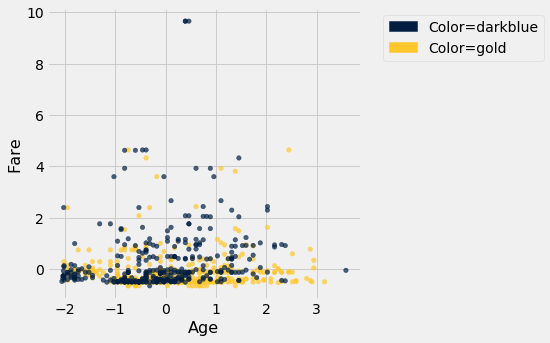

In [57]:
data = data.join('Survived', color_table)
data.scatter('Age', 'Fare', group='Color')

In [58]:
shuffled_data = data.sample(with_replacement=False)
training = shuffled_data.take(np.arange(438)) # 877/2 = 438
testing = shuffled_data.take(np.arange(438, 877))

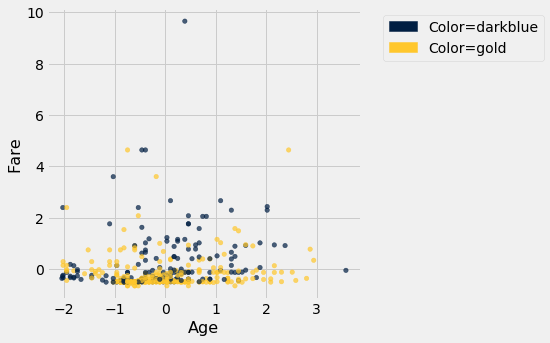

In [59]:
training.scatter('Age', 'Fare', group='Color')

In [62]:
alice = make_array(18, 0.25)
plots.scatter(alice.item(0), alice.item(1), color='red', s=30);

NameError: name 'plots' is not defined